In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

# Data 분석

In [3]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


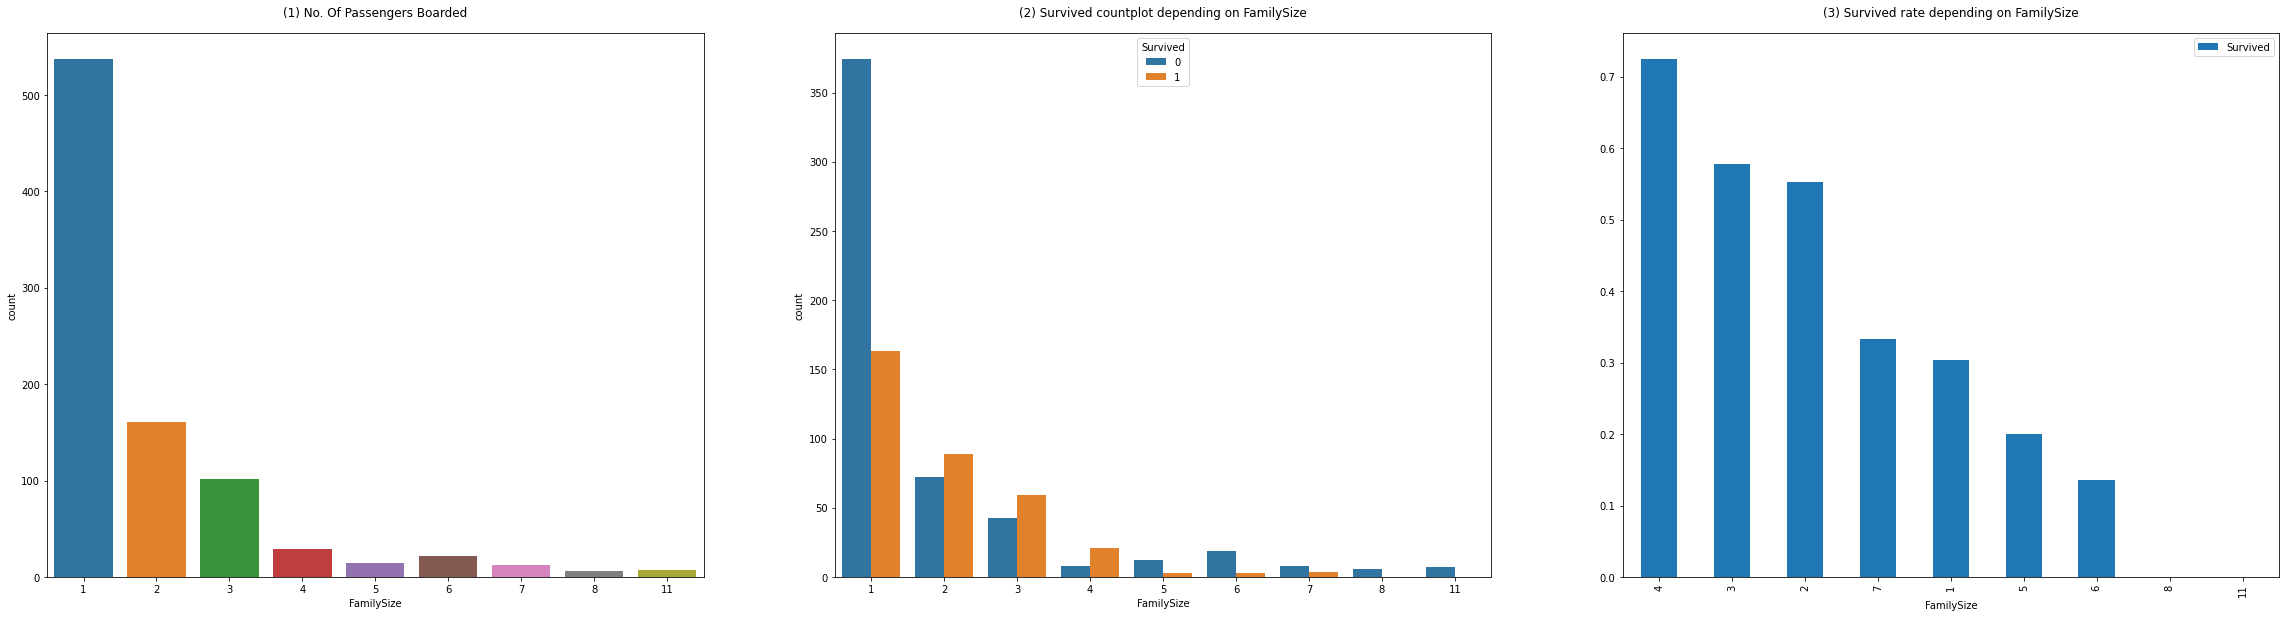

In [4]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Fare

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


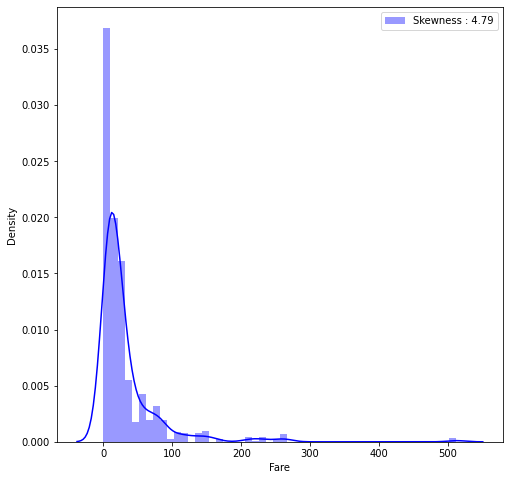

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [6]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

비대칭성은 log 를 취하여 분석하기

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


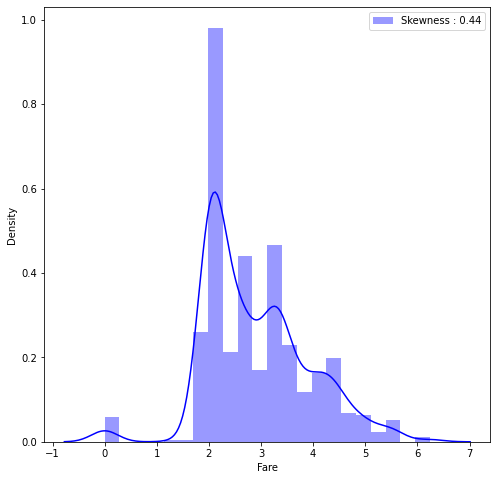

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

### Cabin

# Feature Engineering

In [8]:
df_train['Initial']=df_train["Name"].str.extract('([A-Za-z]+)\.')
df_test['Initial']=df_test["Name"].str.extract('([A-Za-z]+)\.')


In [9]:
# Column 간의 상대성을 볼 수 있는 crosstab!!!!
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [10]:
# 성을 치환해준다
df_train['Initial'].replace(['Mile','Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                          ['Miss', 'Miss','Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Other', 'Other','Other','Mr','Mr','Mr','Mr','Mr'], inplace=True)
df_test['Initial'].replace(['Mile','Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                          ['Miss', 'Miss','Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Other', 'Other','Other','Mr','Mr','Mr','Mr','Mr'], inplace=True)

In [11]:
# 성 별 평균 확인
df_train.groupby("Initial").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,456.214953,0.160748,2.377570,32.890361,0.291589,0.151402,2.653408,1.442991
Mrs,453.984127,0.793651,1.992063,36.009174,0.698413,0.825397,3.435684,2.523810
Other,731.500000,0.500000,1.000000,46.750000,0.000000,0.000000,2.827177,1.000000


In [12]:
# 성 별 평균 확인
df_test.groupby("Initial").mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,
Master,1123.380952,2.714286,7.406471,1.571429,1.380952,3.112730,3.952381
Miss,1100.240506,2.443038,21.774844,0.544304,0.392405,2.927526,1.936709
Mr,1102.028689,2.307377,32.187166,0.274590,0.180328,2.745888,1.454918
Mrs,1090.097222,1.833333,38.903226,0.597222,0.833333,3.566570,2.430556
Other,1058.500000,1.000000,50.000000,0.500000,0.000000,4.388582,1.500000


<AxesSubplot:xlabel='Initial'>

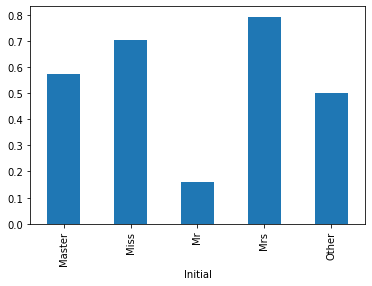

In [13]:
df_train.groupby("Initial")['Survived'].mean().plot.bar()

### concat
- 데이터를 쌓는다.

### merge
- 같은 컬럼이 있을때, 그 컬럼을 기준으로 합친다

In [14]:
df_all = pd.concat([df_train, df_test])
df_all.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,3.262225,4.426230
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,3.065227,2.147170
Mr,658.498074,0.160748,2.355584,32.671927,0.286264,0.160462,2.682374,1.446727
Mrs,685.297980,0.793651,1.934343,37.058480,0.661616,0.828283,3.483279,2.489899
Other,840.500000,0.500000,1.000000,47.833333,0.166667,0.000000,3.347645,1.166667


Pandas DataFrame 에는 location 이 자주 쓰인다
- .loc[]

In [15]:
# 2번째 Row 의 전체 Column
df_train.loc[1, :]

# 2~3번째 Row 의 전체 Column
df_train.loc[1:3, :]

# df_train['Survived']==1 인 Row 를 출력하라
df_train.loc[df_train['Survived']==1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.409941,NaN,S,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,3.403555,NaN,C,2,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,1.977547,NaN,C,1,Miss
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,4.420746,C50,C,2,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,3.258097,NaN,S,2,Mrs
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss


In [16]:
# Age 가 Null 이고, Initial 이 Mr 인 Row의 나이를 33세로 변경한다
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mr'), 'Age']=33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mrs'), 'Age']=37
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Master'), 'Age']=5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Miss'), 'Age']=22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Other'), 'Age']=45

df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Mr'), 'Age']=33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Mrs'), 'Age']=37
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Master'), 'Age']=5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Miss'), 'Age']=22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Other'), 'Age']=45


In [17]:
# 나이 Null 값 채우기
df_train['Age'].isnull().sum()

0

# Embarked Feature Engineering

In [18]:
df_train.loc[df_train['Embarked'].isnull()]

#df_test.loc[df_test['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN,1,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN,1,Mrs


In [19]:
# Null 값 채우기
df_train['Embarked'].fillna('S', inplace=True)

In [20]:
# Continuous Feature 를 카테고리로 만들기 (Labeling)

# Age_cat Column 추가
df_train['Age_cat']=0
df_test['Age_cat']=0


df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [21]:
# 하드코딩 ㅠ
df_train.loc[df_train['Age']<10, 'Age_cat']= 0
df_train.loc[(df_train['Age']>=10) & (df_train['Age']<20), 'Age_cat']=1
df_train.loc[(df_train['Age']>=20) & (df_train['Age']<30), 'Age_cat']=2
df_train.loc[(df_train['Age']>=30) & (df_train['Age']<40), 'Age_cat']=3
df_train.loc[(df_train['Age']>=40) & (df_train['Age']<50), 'Age_cat']=4
df_train.loc[(df_train['Age']>=50) & (df_train['Age']<60), 'Age_cat']=5
df_train.loc[(df_train['Age']>=60) & (df_train['Age']<70), 'Age_cat']=6
df_train.loc[(df_train['Age']>=70), 'Age_cat']=7

df_test.loc[df_test['Age']<10, 'Age_cat']= 0
df_test.loc[(df_test['Age']>=10) & (df_test['Age']<20), 'Age_cat']=1
df_test.loc[(df_test['Age']>=20) & (df_test['Age']<30), 'Age_cat']=2
df_test.loc[(df_test['Age']>=30) & (df_test['Age']<40), 'Age_cat']=3
df_test.loc[(df_test['Age']>=40) & (df_test['Age']<50), 'Age_cat']=4
df_test.loc[(df_test['Age']>=50) & (df_test['Age']<60), 'Age_cat']=5
df_test.loc[(df_test['Age']>=60) & (df_test['Age']<70), 'Age_cat']=6
df_test.loc[(df_test['Age']>=70), 'Age_cat']=7

In [22]:
# 함수 활용 !! ! apply
def category_age(x):
    if x<10:
        return 0
    elif x<20:
        return 1
    elif x<30:
        return 2
    elif x<40:
        return 3
    elif x<50:
        return 4
    elif x<60:
        return 5
    elif x<70:
        return 6
    else:
        return 7

# df_train 의 Age Column 에  "category_age" 함수를 apply(적용) 한다
df_train['Age_cat_2']=df_train['Age'].apply(category_age)

In [23]:
# 하드코딩과 함수의 결과가 동일한지 확인~~~~
(df_train['Age_cat'] == df_train['Age_cat_2']).all()
        # all 은 모~~~두 참이면 True 반환
        # any 는 하나라도 참이면 True 반환
        
# 열 Drop
df_train.drop(['Age','Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)


# Feature Engineering 3
### Str 데이터를 수치 데이터로 변환하기

In [24]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [25]:
df_test.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [26]:
df_train['Initial'] = df_train['Initial'].map({"Master":0, "Miss":1, "Mr":2, "Mrs":3, "Other":4})
df_test['Initial'] = df_test['Initial'].map({"Master":0, "Miss":1, "Mr":2, "Mrs":3, "Other":4})

In [27]:
# 속성 확인하는 두 가지 방법
df_train['Embarked'].unique() # type = ndarray
df_train['Embarked'].value_counts() # type = Series

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
df_train['Embarked'] = df_train['Embarked'].map({"C":0, "Q":1, "S":2})
df_test['Embarked'] = df_test['Embarked'].map({"C":0, "Q":1, "S":2})

In [29]:
# Null 값이 있는지 확인하기~~~
df_train['Embarked'].isnull().any()
df_train['Embarked'].isnull().sum()

0

In [30]:
df_train['Sex'] = df_train['Sex'].map({"female":0, "male":1})
df_test['Sex'] = df_test['Sex'].map({"female":0, "male":1})

In [31]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


### Correlation
    - 상관관계 구하는 방법

In [32]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]

In [33]:
heatmap_data.corr()

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.071083,-0.095002
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.132000,-0.314809
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.037201,0.122917
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.016626,0.077791
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.021161,-0.033173
FamilySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,-0.204064,-0.280537
Initial,-0.071083,-0.132000,0.037201,-0.016626,0.021161,-0.204064,1.000000,0.476739
Age_cat,-0.095002,-0.314809,0.122917,0.077791,-0.033173,-0.280537,0.476739,1.000000


heatmap : 주로 correrlation 을 확인할때 사용하기 쉽다
- linewidth : 박스 간 간격
- vmax : 색의 범위

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

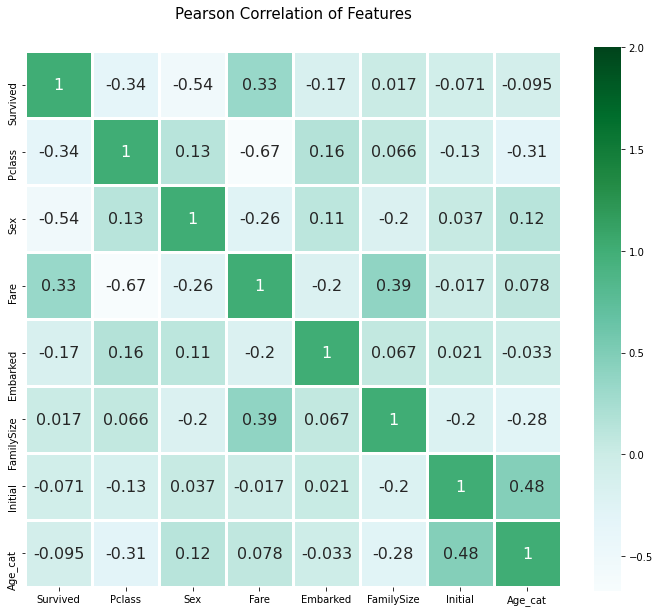

In [34]:
colormap = plt.cm.BuGn
plt.figure(figsize=(12,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=1.1, vmax=2.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":16})



# One-hot-encoding

In [35]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix = 'Initial')

In [36]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix = 'Embarked')

## 필요없는 Column 삭제하기

In [37]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)


# Model Development

In [38]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [39]:
from sklearn.model_selection import train_test_split
X_tr, X_vid, y_tr, y_vid = train_test_split(X_train, target_label, test_size=0.3, random_state=44)

Machine Learning



In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [41]:
prediction = model.predict(X_vid)
prediction.shape

(268,)

In [42]:
print(" 총 {} 명 중 {:.2f}% 정확도로 맞춤".format(y_vid.shape[0], 100 * metrics.accuracy_score(prediction, y_vid)))
# 다른 방법으로 정확도 측정하기
(prediction == y_vid).sum() / prediction.shape[0]

 총 268 명 중 74.25% 정확도로 맞춤


0.7425373134328358

# Feature importance
- 어떤 feature 에 영향을 많이 받았는지 확인할 수 있다.
    - ex.) 10 = 4*x1 + 2*x2 + 1*x3 에서 x1 에 가장 큰 영향을 받는다

In [43]:
len(model.feature_importances_)


13

In [44]:
from pandas import Series

In [45]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

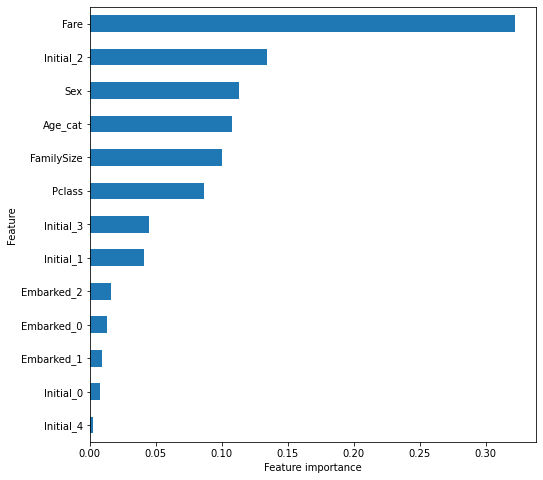

In [46]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

### 관찰 결과
- Fare, Sex, Age 가 중요한것을 알 수 있다
- 하위 ??  개를 제외하고 Feature Selection 을 통해 정확도를 높일 수 있다.


# Kaggle 에 제출하기

In [47]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [48]:
prediction = model.predict(X_test)


In [49]:
# 예측한 값을 제출값에 적용
submission['Survived'] = prediction

In [50]:
submission.to_csv('./my_first_submission.csv', index=False)